In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file_path = '../data/input/new_feats_data.csv'

data = pd.read_csv(file_path)
duas_horas = 120

In [6]:
data.head()

,route,tripNum,shapeId,routeFrequency,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,...,MONTH(alertDateTimeSB),MONTH(jamUpdateDateTimeSB),WEEKDAY(gps_datetime),WEEKDAY(precipitationTime),WEEKDAY(alertDateTime),WEEKDAY(jamUpdateDateTime),WEEKDAY(gps_datetimeSB),WEEKDAY(precipitationTimeSB),WEEKDAY(alertDateTimeSB),WEEKDAY(jamUpdateDateTimeSB)
0,68,1,Route_160,low_frequency,12573,-8.036592,-34.975683,785.0,12021,27.0,...,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN
1,68,1,Route_160,low_frequency,12581,-8.034150,-34.960756,2794.0,12021,33.0,...,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN
2,68,1,Route_160,low_frequency,12582,-8.032878,-34.959775,2971.0,12021,NaN,...,12.0,12.0,0,0,0.0,NaN,0,0,0.0,0.0
3,68,1,Route_160,low_frequency,12583,-8.031478,-34.958622,3171.0,12021,35.0,...,12.0,12.0,0,0,0.0,NaN,0,0,0.0,0.0
4,68,1,Route_160,low_frequency,12589,-8.036750,-34.946086,4838.0,12021,43.0,...,12.0,12.0,0,0,0.0,NaN,0,0,0.0,0.0


In [7]:
data.headway

0          299
1          178
2          187
3          204
4          206
          ... 
1657769     72
1657770     72
1657771     72
1657772      0
1657773     73
Name: headway, Length: 1657774, dtype: int64

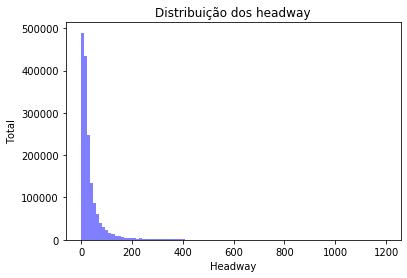

In [43]:
num_bins = 100
plt.hist(data.headway, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Headway')
plt.ylabel('Total')
plt.title('Distribuição dos headway')
plt.show()

In [24]:
print("Min: " + str(min(data.headway)))
print("Max: " + str(max(data.headway)))

Min: 0
Max: 1197


In [20]:
print("Quantidade de dados, dos 11 dias, com headway fora do normal (headway > 2h):")
data[data.headway > duas_horas].shape

Quantidade de dados com headway fora do normal (headway > 2h):


(92858, 111)

In [21]:
print("Quantidade de dados, dos 11 dias, com headway relativamente normal (headway <= 2h):")
data[data.headway <= duas_horas].shape

Quantidade de dados, dos 11 dias, com headway relativamente normal (headway <= 2h):


(1564916, 111)

In [23]:
print("Porcentagem de headways muito altos (headway > 2h):")
perc_hd_alto = data[data.headway > duas_horas].shape[0] / data.shape[0]
perc_hd_alto
print(str(perc_hd_alto*100) + "%")

Porcentagem de headways muito altos (headway > 2h):
5.60136665190792%


In [32]:
hd_alto = data[data.headway > duas_horas]
hd_alto.head()

,route,tripNum,shapeId,routeFrequency,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,...,MONTH(alertDateTimeSB),MONTH(jamUpdateDateTimeSB),WEEKDAY(gps_datetime),WEEKDAY(precipitationTime),WEEKDAY(alertDateTime),WEEKDAY(jamUpdateDateTime),WEEKDAY(gps_datetimeSB),WEEKDAY(precipitationTimeSB),WEEKDAY(alertDateTimeSB),WEEKDAY(jamUpdateDateTimeSB)
0,68,1,Route_160,low_frequency,12573,-8.036592,-34.975683,785.0,12021,27.0,...,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN
1,68,1,Route_160,low_frequency,12581,-8.034150,-34.960756,2794.0,12021,33.0,...,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN
2,68,1,Route_160,low_frequency,12582,-8.032878,-34.959775,2971.0,12021,NaN,...,12.0,12.0,0,0,0.0,NaN,0,0,0.0,0.0
3,68,1,Route_160,low_frequency,12583,-8.031478,-34.958622,3171.0,12021,35.0,...,12.0,12.0,0,0,0.0,NaN,0,0,0.0,0.0
4,68,1,Route_160,low_frequency,12589,-8.036750,-34.946086,4838.0,12021,43.0,...,12.0,12.0,0,0,0.0,NaN,0,0,0.0,0.0


In [31]:
output_path = '../data/input/only_higher_headway.csv'
hd_alto.to_csv(output_path)

In [42]:
print("Quantidade de ônibus diferentes com headway alto:")
print(hd_alto.groupby(['busCode'])['busCode'].nunique().count())

print("Quantidade de ônibus diferentes:")
print(data.groupby(['busCode'])['busCode'].nunique().count())

Quantidade de ônibus diferentes com headway alto:
641
Quantidade de ônibus diferentes:
796


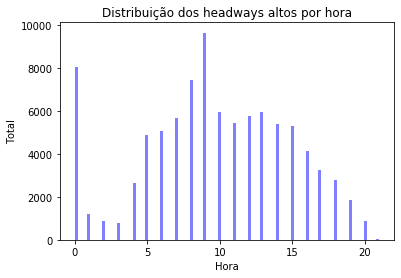

In [45]:
num_bins = 100
plt.hist(hd_alto.GPShour, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Hora')
plt.ylabel('Total')
plt.title('Distribuição dos headways altos por hora')
plt.show()

Arquivos com as datas, antes do processo de FE gerar novas feats.

In [6]:
file_path = '../data/input/integrated_data_before_new_feats.csv'
duas_horas = 120

data_before_fe = pd.read_csv(file_path)

In [7]:
# only higher headways
hd_alto_with_data = data_before_fe[data_before_fe.headway > duas_horas]

In [8]:
output_path = '../data/input/only_higher_headway_with_data.csv'
hd_alto_with_data.to_csv(output_path)

In [9]:
data_before_fe.columns

Index(['route', 'tripNum', 'shapeId', 'routeFrequency', 'shapeSequence',
       'shapeLat', 'shapeLon', 'distanceTraveledShape', 'busCode',
       'gpsPointId', 'gpsLat', 'gpsLon', 'distanceToShapePoint',
       'gps_datetime', 'stopPointId', 'problem', 'precipitation',
       'precipitationTime', 'alertDateTime', 'alertSubtype', 'alertType',
       'alertRoadType', 'alertConfidence', 'alertNComments', 'alertNImages',
       'alertNThumbsUp', 'alertReliability', 'alertReportMood',
       'alertReportRating', 'alertSpeed', 'alertLatitude', 'alertLongitude',
       'alertDistanceToClosestShapePoint', 'alertIsJamUnifiedAlert',
       'alertInScale', 'jamUpdateDateTime', 'jamBlockType', 'jamDelay',
       'jamLength', 'jamLevel', 'jamSeverity', 'jamSpeedKM',
       'jamDistanceToClosestShapePoint', 'headway', 'headwayThreshold',
       'busBunching', 'GPShour', 'tripNumSB', 'shapeSequenceSB', 'shapeLatSB',
       'shapeLonSB', 'distanceTraveledShapeSB', 'busCodeSB', 'gpsPointIdSB',
       

In [51]:
hd_alto_with_data[hd_alto_with_data.gps_datetime.str.contains('2018-12-03')][["route", "shapeId", "shapeSequence", "stopPointId", "busCode", "gps_datetime", "busCodeSB", "gps_datetimeSB", "headway", "problem"]][(hd_alto_with_data.busCode == 81987) & (hd_alto_with_data.stopPointId == 5297)].sort_values(by=['busCode','gps_datetime'])

/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,route,shapeId,shapeSequence,stopPointId,busCode,gps_datetime,busCodeSB,gps_datetimeSB,headway,problem
1654104,138,Route_320,38748,5297,81987,2018-12-03 06:10:38,81822,2018-12-03 17:08:37,657,NO_PROBLEM
1654189,138,Route_321,39197,5297,81987,2018-12-03 07:48:05,81822,2018-12-03 17:08:37,560,NO_PROBLEM
1654190,138,Route_320,38748,5297,81987,2018-12-03 07:55:35,81822,2018-12-03 17:08:37,553,NO_PROBLEM
1654274,138,Route_321,39197,5297,81987,2018-12-03 10:20:10,81822,2018-12-03 17:08:37,408,NO_PROBLEM
1654275,138,Route_320,38748,5297,81987,2018-12-03 10:25:10,81822,2018-12-03 17:08:37,403,NO_PROBLEM
1654359,138,Route_321,39197,5297,81987,2018-12-03 11:58:38,81822,2018-12-03 17:08:37,309,NO_PROBLEM
1654360,138,Route_320,38748,5297,81987,2018-12-03 14:10:39,81822,2018-12-03 17:08:37,177,TRIP_PROBLEM


Analisando a saída do BULMA/BUSTE para confirmar os headways altos.

In [17]:
file_path = '../data/input/BuLMABusTE_2018-12-03.csv'
duas_horas = 120

gps_data = pd.read_csv(file_path)
gps_data.head()

,route,tripNum,shapeId,routeFrequency,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,gpsLon,distanceToShapePoint,gps_datetime,stopPointId,streetName,problem
0,100,1,Route_1056,high_frequency,92003,-7.833023,-34.912125,13033.0,81508,522477,-7.83300619932,-34.9119053617,24.231314,2018-12-03 07:11:34,4619,Acesso a BR-101,NO_PROBLEM
1,100,1,Route_1057,high_frequency,92004,-7.832896,-34.912098,14.0,81508,522479,-7.83299617158,-34.9121228988,11.511684,2018-12-03 07:12:34,4619,Acesso a BR-101,NO_PROBLEM
2,100,2,Route_1057,high_frequency,92004,-7.832896,-34.912098,14.0,81508,522479,-7.83299617158,-34.9121228988,11.511684,2018-12-03 07:12:34,4619,Acesso a BR-101,NO_PROBLEM
3,100,2,Route_1056,high_frequency,92003,-7.833023,-34.912125,13033.0,81508,522578,-7.83291599938,-34.9118596204,31.54318,2018-12-03 08:08:30,4619,Acesso a BR-101,NO_PROBLEM
4,100,3,Route_1057,high_frequency,92004,-7.832896,-34.912098,14.0,81508,522630,-7.83282460667,-34.9120767863,8.237232,2018-12-03 08:35:00,4619,Acesso a BR-101,NO_PROBLEM


Analisando uma saída da integração para checar a questãos das paradas por shapes

In [2]:
file_path = '../data/input/headway_output_2018-12-03.csv'

headway_output = pd.read_csv(file_path)
headway_output.head()

/home/veruska/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,route,tripNum,shapeId,routeFrequency,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,...,alertInScaleSB,jamUpdateDateTimeSB,jamExpirationDateTimeSB,jamBlockTypeSB,jamDelaySB,jamLengthSB,jamLevelSB,jamSeveritySB,jamSpeedKMSB,jamDistanceToClosestShapePointSB
0,96,1,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50673,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,96,1,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50661,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96,1,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50662,320990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96,3,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50673,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,96,1,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50664,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
headway_output[["route", "shapeId", "shapeSequence", "headway", "busCode", "stopPointId", "shapeIdSB", "busCodeSB", "shapeSequenceSB"]][headway_output.busCode == 12162]

,route,shapeId,shapeSequence,headway,busCode,stopPointId,shapeIdSB,busCodeSB,shapeSequenceSB
7255,58,Route_123,9055,94,12162,2611,Route_123,12801,9055
7256,58,Route_123,9055,19,12162,2611,Route_123,12801,9055
7259,58,Route_123,9055,21,12162,2611,Route_123,12801,9055
7261,58,Route_123,9055,23,12162,2611,Route_123,12801,9055
7264,58,Route_123,9055,193,12162,2611,Route_123,12809,9055
7265,58,Route_123,9055,141,12162,2611,Route_123,12809,9055
7266,58,Route_123,9055,95,12162,2611,Route_123,12809,9055
7267,58,Route_123,9055,45,12162,2611,Route_123,12809,9055
7269,58,Route_123,9055,35,12162,2611,Route_123,12809,9055
7271,58,Route_123,9055,39,12162,2611,Route_123,12809,9055


In [5]:
file_path = '../data/input/headway_output_2018-12-03_new.csv'

headway_output_after_shape_key = pd.read_csv(file_path)
headway_output_after_shape_key[["route", "shapeId", "shapeSequence", "busCode", "stopPointId", "shapeIdSB", "busCodeSB", "shapeSequenceSB"]]

,route,shapeId,shapeSequence,busCode,stopPointId,shapeIdSB,busCodeSB,shapeSequenceSB
0,74,Route_174,13735,50222,3404,Route_174,50202,13735
1,74,Route_174,13735,50202,3404,Route_174,50282,13735
2,74,Route_174,13735,50282,3404,Route_174,50272,13735
3,74,Route_174,13735,50272,3404,Route_174,50212,13735
4,74,Route_174,13735,50212,3404,Route_174,50473,13735
5,74,Route_174,13735,50473,3404,Route_174,50232,13735
6,74,Route_174,13735,50232,3404,Route_174,50477,13735
7,74,Route_174,13735,50477,3404,Route_174,50222,13735
8,74,Route_174,13735,50222,3404,Route_174,50202,13735
9,74,Route_174,13735,50202,3404,Route_174,50272,13735
